## Projeto unidade 2.

Para dar início, como de costume, trata-se de importar as bibliotecas,ler o csv e tratá-lo para análise. Logo observando suas especificidades.

In [ ]:
!pip install wordcloud -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
Frame = pd.read_csv('https://raw.githubusercontent.com/Carol-ACDR/Email/main/emails_processados%20(1).csv',sep =',',encoding='UTF-8')
Frame.drop('Unnamed: 0', axis=1, inplace=True)
Frame.drop('thread', axis=1, inplace=True)
Frame['year'] = Frame['year'].astype('string')
Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    624 non-null    object 
 1   from       624 non-null    object 
 2   to         624 non-null    object 
 3   label      624 non-null    object 
 4   dayofweek  624 non-null    object 
 5   timeofday  624 non-null    float64
 6   year       624 non-null    string 
 7   month      624 non-null    object 
 8   weeknum    624 non-null    int64  
dtypes: float64(1), int64(1), object(6), string(1)
memory usage: 44.0+ KB


# Respostas das questões.

# Questão 1

1. Quantos emails foram mandados por semana, por mês e por ano, considerando a janela de tempo dos dados baixados?

Considerando que existem mais de uma semana, mês e ano envolvidos na análise, existe uma necessidade clara de uma estimativa analítica, começaremos por ano, uma vez que o email em questão só começou a ser utilizado ano passado. Afinal, o primeiro período se passou durante ele.


# Ano
Como só existem 2 anos apontados pelo DataFrame, a média e a mediana acabam por coincidir, o que se pode tirar dessas duas informações é que são 312 emails enviados em média por ano durante a janela de tempo em questão. Para uma melhor visualização da situação dos dados, constando que são apenas dois valores a serem analisados, optou-se por um gráfico de barra, é apenas um pequeno comparativo para demonstrar a proximidade e simetria entre estes.

In [ ]:
Frame['year'].value_counts()

2020    322
2021    302
Name: year, dtype: Int64

In [ ]:
Frame['year'].value_counts().median()

312.0

In [ ]:
Frame['year'].value_counts().mean()

312.0

<AxesSubplot:xlabel='year', ylabel='count'>

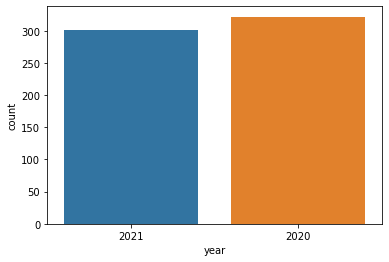

In [ ]:
sns.countplot(x= Frame['year'])

# Mês

Em uma pequena análise aos dados, já se é possível perceber uma enorme discrepância entre as duas medidas centrais, o que aponta para uma distribuição assimétrica. Olhando diretamente para a Série, é possível notar valores extremamente abaixo da média com o valor 15 como o menor, possibilitando uma observação importante: São apenas 3 dos 10 valores que se encontram abaixo de 50. Outra observação muito importante que deve ser considerada, dois desses valores pequenos representam medidas que não completaram seu todo(não representam o mês completo), são essas Agosto(August) cujo mês representa o início da utilização do e-mail acadêmico(email criado do meio para o fim de Agosto) e Maio(May), que seria o mês atual em que a análise ocorre, Maio ainda está iniciando, então parte dos emails que poderiam fazer uma diferença considerável nos números não está presente. O desvio padrão aponta uma variação mais acentuada. Agora, respondendo a pergunta 1 e considerando a presença de tais e seus motivos, seria mais plausível afirmar que,em média, a caixa de email recebe em torno de 76 emails por mês.

Outro ponto, para fins de esclarecimento, só há 10 dos 12 meses de um ano na contagem. Isso se dá justamente pelo fato do e-mail ter sido iniciado em Agosto do ano passado, sendo assim, o email ainda não passou pelos períodos de Junho e Julho.


In [ ]:
Mes = Frame.groupby('year')['month'].value_counts()
print("Media:",Mes.mean())
print("Mediana:",Mes.median())
print("Moda:",Mes.mode())
Mes

Media: 62.4
Mediana: 76.0
Moda: 0    85
dtype: int64


year  month    
2020  October      99
      November     81
      September    71
      December     55
      August       16
2021  March        92
      April        85
      February     85
      January      25
      May          15
Name: month, dtype: int64

<AxesSubplot:xlabel='count', ylabel='month'>

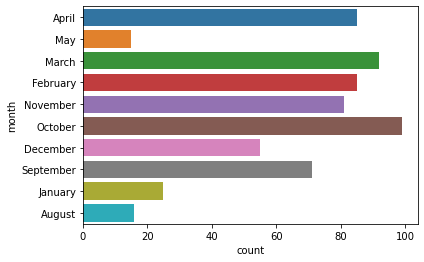

In [ ]:
sns.countplot(y= Frame['month'])

In [ ]:
print("Desvio padrão:",Mes.std(ddof = 0))

Desvio padrão: 30.838936427834216


# Semana

Analisando agora os dados de envios semanais, a diferença entre a variação dos números é aparentemente menor, fato contratado ainda mais pelo desvio padrão, algo curioso a se notar, seria a falta da semana 53 de 2020 e da semana 1 de 2021, em uma rápida pesquisa pelos emails, nota-se que não há nenhuma instância de emails nessas semanas, motivo pelo qual o value counts nem conta com estas. A título de curiosidade, a média, adicionando essas datas desceria para aproximadamente 17.333, e a mediana permaneceria em seu local. Nesse caso em específico, creio que a resposta que melhor se aplica seria em torno de 17 a 18 e-mails por semana, pois, sempre haverá semanas onde recebe-se mais email e outras que recebem menos.

In [ ]:
Semana = Frame.groupby('year')['weeknum'].value_counts()
print("Media:",Semana.mean())
print("Mediana:",Semana.median())
Semana

Media: 18.352941176470587
Mediana: 21.0


year  weeknum
2020  40         31
      39         26
      41         25
      49         25
      50         25
      36         24
      43         24
      47         23
      42         21
      46         21
      45         19
      48         14
      44         13
      35          9
      37          9
      38          7
      51          6
2021  5          30
      11         28
      8          26
      9          24
      17         24
      15         23
      6          22
      10         21
      16         21
      14         20
      4          19
      12         17
      18          9
      7           7
      13          5
      3           4
      2           2
Name: weeknum, dtype: int64

<AxesSubplot:xlabel='count', ylabel='weeknum'>

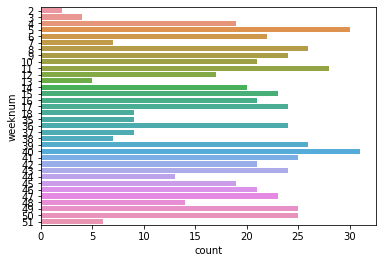

In [ ]:
sns.countplot(y= Frame['weeknum'])

In [ ]:
print("Desvio padrão:",Semana.std(ddof = 0))

18.5

# Questão 2

2. Há uma variação significativa na quantidade de emails enviados por cada período considerado na questão anterior?

Como já debatido durante a primeira questão, sim, há, a quantidade de emails durante semanas e meses especialmente. Como só existem dois anos, é um pouco mais desafiador fazer uma estimativa, principalmente pois os dois anos têm informações mensais faltando, a variação encontrada segue abaixo.

# Ano

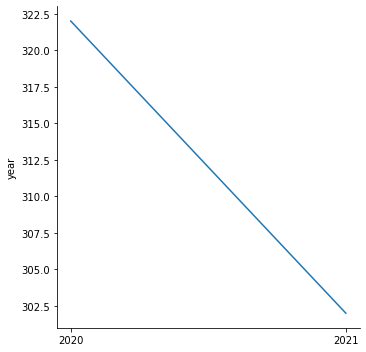

In [ ]:
sns.relplot(x = Frame['year'].value_counts().index,y = Frame['year'].value_counts(), kind = 'line')

# Mês

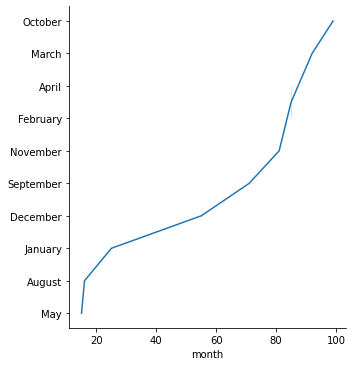

In [ ]:
sns.relplot(y = Frame['month'].value_counts().index,x = Frame['month'].value_counts(), kind = 'line')

# Semana

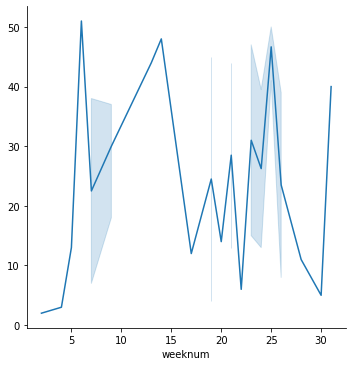

In [ ]:
sns.relplot(y = Frame['weeknum'].value_counts().index,x = Frame['weeknum'].value_counts(), kind = 'line')

# Questão 3

3. Existe algum período, dos considerados nas duas questões anteriores, em que o número de emails enviados possa ser considerado um outlier? Você enxerga alguma justificativa para esse período ter esse outlier, caso haja?

Não há a presença de outliers em nenhum dos períodos.

Um período o qual talvez pudesse vir a ser um outlier seria  o mês de Janeiro, no entanto, pelas condições de data que já foram apresentadas (3 dos 10 meses possuindo um número de emails enviados e/ou recebidos menor que 50), o desvio padrão se também cresceu, acomodando as 3 variáveis, como é possível perceber pelo gráfico abaixo.

Caso Janeiro fosse um outlier, uma justificativa plausível seria que, sendo dados de um e-mail acadêmico, o início e metade de Janeiro são férias, então não existe nenhuma troca de informação académica real até o final de Janeiro, quando se iniciam as aulas.

# Ano

<AxesSubplot:xlabel='year'>

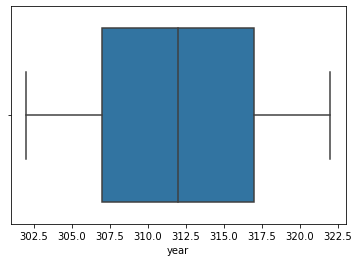

In [ ]:
sns.boxplot(x = Frame['year'].value_counts())


# Mês

<AxesSubplot:xlabel='month'>

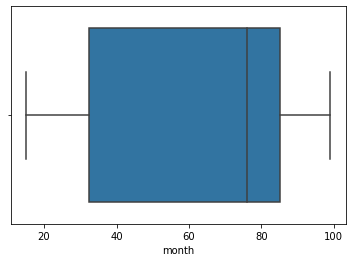

In [ ]:
sns.boxplot(x = Frame['month'].value_counts())

# Semana

<AxesSubplot:xlabel='weeknum'>

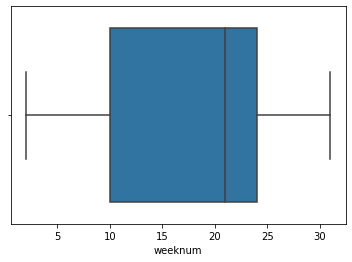

In [ ]:
sns.boxplot(x = Frame['weeknum'].value_counts())

# Questão 4.

4. Qual é o número médio de e-mails por hora? Essa média varia ao longo da semana?

Como o dataframe conta somente as horas onde o email foi recebido, para saber da média faz-se um cálculo com o Número de Semanas x 7(dias) x 24(horas do dia) para se obter o resultado desejado, a média de emails por hora é de 0.1, o que significaria em teoria que se passam aproximadamente 10 horas em média do recebimento de um email para outro.

Como foi possível notar pelos cálculos separados das medidas abaixo, sim, essa média varia durante a semana, há uma quantidade maior de emails nas segundas e uma menor nas sextas.

Sobre os cálculos feitos, foi necessário fazer as médias separadas para incluir as 24 horas do dia na divisão, além de somar as duas semanas faltosas onde não ocorreram trocas de e-mail. 

In [ ]:
Frame['timeofday'] = Frame['timeofday'].round()
Frame['timeofday'].replace( to_replace=24,value=0,inplace=True)
Horas = Frame.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()
print('Media de emails por hora:',Horas.sum()/(36*24*7))
print('Mediana de emails por hora:',0)


Segunda  = Frame[Frame['dayofweek'] == 'Monday']
SegundaS = len(Segunda['weeknum'].unique())
SegundaD  = Segunda.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()

print('Media no durante as segundas:',(SegundaD.sum())/((SegundaS+2)*24))

Se = (SegundaD.sum())/((SegundaS+2)*24)

Terça = Frame[Frame['dayofweek'] == 'Tuesday']
TerçaS = len(Terça['weeknum'].unique())
TerçaD  = Terça.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()

print('Media no durante as Terças:',(TerçaD.sum())/((TerçaS+2)*24))

Te = (TerçaD.sum())/((TerçaS+2)*24)

Quarta = Frame[Frame['dayofweek'] == 'Wednesday']
QuartaS = len(Quarta['weeknum'].unique())
QuartaD  = Quarta.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()

print('Media no durante as Quartas:',(QuartaD.sum())/((QuartaS+2)*24))

Quar = (QuartaD.sum())/((QuartaS+2)*24)

Quinta = Frame[Frame['dayofweek'] == 'Thursday']
QuintaS = len(Quinta['weeknum'].unique())
QuintaD  = Quinta.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()

print('Media no durante as Quintas:',(QuintaD.sum())/((QuintaS+2)*24))

Quin = (QuintaD.sum())/((QuintaS+2)*24)

Sexta = Frame[Frame['dayofweek'] == 'Friday']
SextaS = len(Sexta['weeknum'].unique())
SextaD  = Sexta.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()

print('Media no durante as Sextas:',(SextaD.sum())/((SextaS+2)*24))

Set =(SextaD.sum())/((SextaS+2)*24)

Sabado = Frame[Frame['dayofweek'] == 'Saturday']
SabadoS = len(Sabado['weeknum'].unique())
SabadoD  = Sabado.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()

print('Media no durante as Sabados:',(SabadoD.sum())/((SabadoS+2)*24))

Sab = (SabadoD.sum())/((SabadoS+2)*24)

Domingo = Frame[Frame['dayofweek'] == 'Sunday']
DomingoS = len(Domingo['weeknum'].unique())
DomingoD  = Domingo.groupby(['weeknum','dayofweek'])['timeofday'].value_counts()
print('Media no durante as Domingos:',(DomingoD.sum())/((DomingoS+2)*24))

Dom = (DomingoD.sum())/((DomingoS+2)*24)

Media de emails por hora: 0.10317460317460317
Mediana de emails por hora: 0
Media no durante as segundas: 0.20052083333333334
Media no durante as Terças: 0.10919540229885058
Media no durante as Quartas: 0.13936781609195403
Media no durante as Quintas: 0.135752688172043
Media no durante as Sextas: 0.09375
Media no durante as Sabados: 0.09868421052631579
Media no durante as Domingos: 0.10972222222222222


<AxesSubplot:>

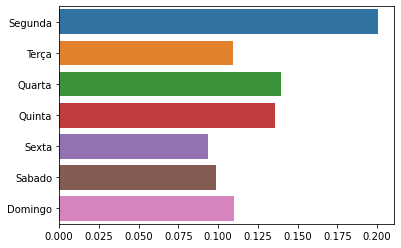

In [ ]:
sns.barplot(y= ['Segunda','Terça','Quarta','Quinta','Sexta','Sabado','Domingo'], x= [Se,Te,Quar,Quin,Set,Sab,Dom])

# Questão 5

5. Com quem me comunico com mais frequência, por meio de emails? Considere tanto por envio, quanto por recepção de emails


Em questão de e-mails recebidos, a maior quantidade vem de uma das salas do classroom, notificações, o que faz bastante sentido, afinal, é um e-mail acadêmico.

Com relação aos enviados, não houve muitos, a maior constância foi com outro email acadêmico.



<AxesSubplot:xlabel='from'>

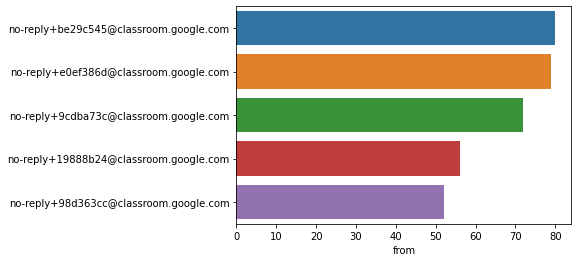

In [ ]:
Recebido = Frame[Frame['label'] == 'inbox']
Enviado = Frame[Frame['label'] == 'enviado']
sns.barplot(y= Frame['from'].value_counts().head().index, x= Frame['from'].value_counts().head())

# Questão 6

6. Quais os temas mais comumente tratados nos emails considerados? 

Temas relacionados ao âmbito estudantil,materiais de estudo, geralmente.

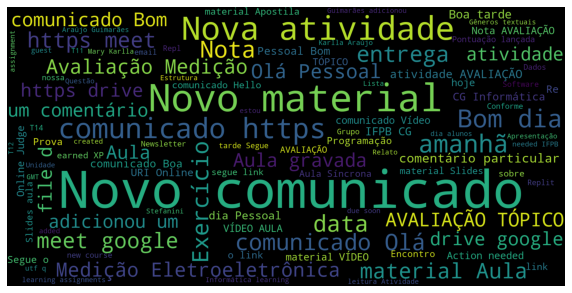

In [ ]:
Frame['subject'].value_counts()
Palavras = " ".join(s for s in Frame['subject'])
stopwords = set(STOPWORDS)
stopwords.update(["da","meu","em","você","de","ao","os","as","para","é","na","e"])
wordcloud = WordCloud(stopwords=stopwords,background_color="black",width=1600, height=800,max_words =100).generate(Palavras)

fig,ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

# Questão 7

7.  Qual o horário onde mais e-mails são recebidos? Existe variação a cada dia da semana? Há motivo provável?



Geralmente, os emails são recebidos às 11:00, isso se dá pois geralmente é horário de troca de aulas e alguns professores já tratam de disponibilizar o material logo cedo.

Sim, varia a cada dia da semana.

As Segundas continuam tendo seu horário com mais e-mails às 11, uma vez que tenho duas aulas via classroom pela manhã.
As Terças não há aulas síncronas, mas nada impede que receba notificações de materiais.
As Quartas só há uma aula no classroom, então a primeira notificação e mais constante é a da sala meet
As Quintas nenhuma das aulas é no classroom, as notificações(quando existem) tardam a chegar.
Às Sextas há apenas uma aula pela manhã.
Aos Sábados por vezes há recepção de provas por fazer ou correção das mesmas.
Nos Domingos recebe-se aviso sobre as provas que se deve fazer até segunda.

<AxesSubplot:ylabel='timeofday'>

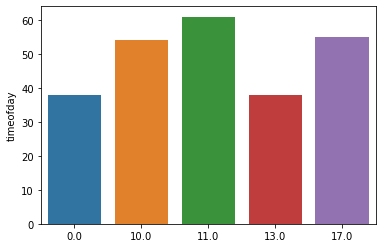

In [ ]:
sns.barplot(x= Frame['timeofday'].value_counts().head().index, y= Frame['timeofday'].value_counts().head())

In [ ]:
print(Frame['timeofday'].value_counts().head(2))
Segunda = Frame[Frame['dayofweek']== 'Monday']
Segunda.name = 'Segunda'
print(Segunda['timeofday'].value_counts().head(2))


Terça = Frame[Frame['dayofweek']== 'Tuesday']
print(Terça['timeofday'].value_counts().head(2))


Quarta = Frame[Frame['dayofweek']== 'Wednesday']
print(Quarta['timeofday'].value_counts().head(2))

Quinta = Frame[Frame['dayofweek']== 'Thursday']
print(Quinta['timeofday'].value_counts().head(2))

Sexta = Frame[Frame['dayofweek']== 'Friday']
print(Sexta['timeofday'].value_counts().head(2))

Sabado = Frame[Frame['dayofweek']== 'Saturday']
print(Sabado['timeofday'].value_counts().head(2))

Domingo = Frame[Frame['dayofweek']== 'Sunday']
print(Domingo['timeofday'].value_counts().head(2))

11.0    61
17.0    55
Name: timeofday, dtype: int64
11.0    20
17.0    17
Name: timeofday, dtype: int64
16.0    11
19.0     9
Name: timeofday, dtype: int64
10.0    26
11.0    17
Name: timeofday, dtype: int64
21.0    13
17.0    12
Name: timeofday, dtype: int64
11.0    10
8.0      8
Name: timeofday, dtype: int64
14.0    6
0.0     4
Name: timeofday, dtype: int64
22.0    11
20.0    10
Name: timeofday, dtype: int64
